# 2章　パーセプトロン

2入力のパーセプトロンで AND NAND OR ゲートを実装する  
動作原理

\begin{cases} 
    0 \quad ( w_{1}x_{1} + w_{2}x_{2} <=　{θ}) \\
    1 \quad ( w_{1}x_{1} + w_{2}x_{2} >　{θ}) \\
            \end{cases} 
      
w1 w2 θ の値でゲートを作用させる


In [1]:
def AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = x1*w1 + x2*w2
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1

In [11]:
AND(0, 0)

0

In [12]:
AND(1, 0)

0

In [13]:
AND(0, 1)

0

In [14]:
AND(1, 1)

1

In [9]:
import numpy as np

In [10]:
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    elif tmp > 0:
        return 1

In [15]:
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    elif tmp > 0:
        return 1

In [19]:
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    elif tmp > 0:
        return 1

In [20]:
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

# 3章　活性化関数

In [23]:
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

In [24]:
def step_function(x):
    y = x > 0
    # bool to int 
    return y.astype(np.int)

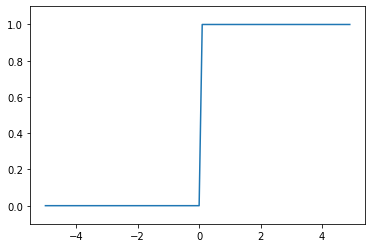

In [32]:
import matplotlib.pyplot as plt

def step_function(x):
    return np.array(x > 0, dtype=int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

In [36]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

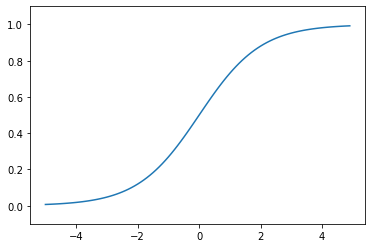

In [37]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

In [38]:
def relu(x):
    return np.maximum(0, x)

In [39]:
def identity_function(x):
    return x

In [46]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network
    
def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y

In [47]:
network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)


[0.31682708 0.69627909]


普通のソフトマックスだとオーバーフローになるのでソフトマックスの分母分子にCをかけて変形する

In [48]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    # numpy形式の多クラス確率表現を返す
    return exp_a / sum_exp_a

load_mnistの形式　(訓練画像、訓練ラベル), (テスト画像、テストラベル)

In [49]:
import sys
import os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!


In [50]:
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [51]:
from PIL import Image

In [57]:
def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

In [59]:
img = x_train[0]
label = t_train[0]
print(label)

print(img.shape)
img = img.reshape(28, 28)
print(img.shape)

img_show(img)

5
(784,)
(28, 28)


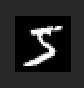

推論処理

In [70]:
import pickle

In [71]:
def init_network():
    with open("sample_weight.pkl", "rb") as f:
        network = pickle.load(f)
    return network

In [72]:
def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    
    return y

In [73]:
x, t = x_test, t_test

In [74]:
network = init_network()

In [75]:
accuracy_cnt = 0

for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)
    if p == t[i]:
        accuracy_cnt += 1
    
print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

/var/folders/wq/drpdghd906v3k864t_7dnrw00000gn/T/ipykernel_44123/1253679003.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Accuracy:0.9207


In [77]:
x, t = x_test, t_test
network = init_network()
batch_size = 100
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])
    
print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9207


/var/folders/wq/drpdghd906v3k864t_7dnrw00000gn/T/ipykernel_44123/1253679003.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [84]:
print(t[9900:10000])

[8 9 0 1 2 3 4 5 6 7 8 0 1 2 3 4 7 8 9 7 8 6 4 1 9 3 8 4 4 7 0 1 9 2 8 7 8
 2 6 0 6 5 3 3 3 9 1 4 0 6 1 0 0 6 2 1 1 7 7 8 4 6 0 7 0 3 6 8 7 1 5 2 4 9
 4 3 6 4 1 7 2 6 5 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6]


In [79]:
print(p)

[8 4 0 1 2 9 4 5 6 7 8 0 1 2 3 4 9 8 9 7 8 6 4 1 9 3 8 4 4 7 0 1 9 2 8 7 8
 2 6 0 0 6 3 3 8 9 1 4 0 6 1 0 0 6 2 1 1 7 7 8 4 6 0 7 0 3 6 8 7 1 3 2 4 9
 4 2 6 4 1 7 2 6 2 0 1 2 8 4 5 6 7 8 9 0 1 2 3 4 8 6]


# 4章　学習

In [85]:
def cross_entropy(y, t):
    delta = le-7
    return -np.sum(t * np.log(y + delta))

In [89]:
(x_train, t_train), (x_test, t_test) = load_mnist(one_hot_label=True, normalize=True)

In [90]:
print(x_train.shape)

(60000, 784)


In [91]:
print(t_train.shape)

(60000, 10)
